`KDD2024 Tutorial / A Hands-On Introduction to Time Series Classification and Regression`

# Classifier and regressor capabilities

## Univariate Classification

To finish off, we build all classifiers and regressors on our example EEG data and
compare accuracy. We do not go into depth into the relative performance, because this
 these are very small toy datasets. We start by listing classifiers by their
 capabilities

In [26]:
# There are some deprecation warnings present in the notebook, we will ignore them.
# Remove this cell if you are interested in finding out what is changing soon, for
# aeon there will be big changes in out v1.0.0 release!
import warnings

warnings.filterwarnings("ignore")
from aeon.registry import all_estimators
uni_cls=all_estimators("classifier", filter_tags={"capability:multivariate": False},
               as_dataframe=True)
print("Univariate series only classifiers\n",uni_cls.iloc[:,0])
uni_reg=all_estimators("regressor", filter_tags={"capability:multivariate": False},
               as_dataframe=True)
print("Univariate only regressors\n",uni_reg.iloc[:,0])

multi_cls=all_estimators("classifier", filter_tags={"capability:multivariate": True},
               as_dataframe=True)
print("Classifiers that can handle multivariate\n",multi_cls.iloc[:,0])
multi_reg=all_estimators("regressor", filter_tags={"capability:multivariate": True},
               as_dataframe=True)
print("Regressors that can handle multivariate\n",multi_reg.iloc[:,0])


Univariate series only classifiers
 0                   BOSSEnsemble
1             ClassifierPipeline
2               ContractableBOSS
3                     HIVECOTEV1
4                 IndividualBOSS
5                MrSQMClassifier
6                  ProximityTree
7                RSASTClassifier
8                 SASTClassifier
9                         WEASEL
10                     WEASEL_V2
11    WeightedEnsembleClassifier
Name: name, dtype: object
Univariate only regressors
 0    RegressorPipeline
Name: name, dtype: object
Classifiers that can handle multivariate
 0                                      Arsenal
1                                CNNClassifier
2            CanonicalIntervalForestClassifier
3                            Catch22Classifier
4                    ChannelEnsembleClassifier
5                              DrCIFClassifier
6                              DummyClassifier
7                              ElasticEnsemble
8                            EncoderClassifier


## Unequal length series

Currently few classifiers and regessors support unequal length series and none
internally handle missing values. This will change soon. Until then, we advise using
padding or truncation


In [27]:
uneq_cls=all_estimators("classifier", filter_tags={"capability:unequal_length": True},
               as_dataframe=True)
print("Classifiers that can handle unequal length series\n",uneq_cls.iloc[:,0])
uneq_reg=all_estimators("regressor", filter_tags={"capability:unequal_length": True},
               as_dataframe=True)
print("Regressors that can handle unequal length series\n",uneq_reg.iloc[:,0])


Classifiers that can handle unequal length series
 0                 Catch22Classifier
1                   DummyClassifier
2                   ElasticEnsemble
3    KNeighborsTimeSeriesClassifier
4                    RDSTClassifier
Name: name, dtype: object
Regressors that can handle unequal length series
 0                 Catch22Regressor
1                   DummyRegressor
2    KNeighborsTimeSeriesRegressor
3                    RDSTRegressor
Name: name, dtype: object


## Performance on EEG data

We can create, fit and predict with these list of classifiers. We will use the EEG
data made for this tutorial. Do not interpret much with regard to relative
performance, this is for illustrative purposes only. However, the variance in results
 does suggest that the classifiers work differently. We exclude estimators that
 require arguments in the constructor such as Pipelines.

In [28]:
from aeon.datasets import load_from_tsfile

X_train_c, y_train_c = load_from_tsfile("./data/KDD_UTSC_TRAIN.ts")
X_test_c, y_test_c = load_from_tsfile("./data/KDD_UTSC_TEST.ts")

for _, c in uni_cls.iterrows():
    if c[0] not in ["ClassifierPipeline","MrSQMClassifier","WeightedEnsembleClassifier"]:
        print()
        clf = c[1]()
        clf.fit(X_train_c, y_train_c)
        print(c[0]," accuracy = ", clf.score(X_test_c, y_test_c))


BOSSEnsemble  accuracy =  0.6

ContractableBOSS  accuracy =  0.525

HIVECOTEV1  accuracy =  0.875

IndividualBOSS  accuracy =  0.525

ProximityTree  accuracy =  0.6

RSASTClassifier  accuracy =  0.75

SASTClassifier  accuracy =  0.75

WEASEL  accuracy =  0.725

WEASEL_V2  accuracy =  0.55


### Multivariate classifiers on the univariate data

We can use multivariate classifiers on univariate data (except for MUSE). Some are
excluded from this example because they require constructor arguments, are very slow
especially on CPU, require non standard imports or generate many warnings on this data. This cell will take a while to execute.

In [29]:
excl = ["MUSE", "EncoderClassifier", "ChannelEnsembleClassifier","FCNClassifier",
        "HIVECOTEV2", "IntervalForestClassifier", "LearningShapeletClassifier",
        "InceptionTimeClassifier","IndividualInceptionClassifier",
        "IndividualOrdinalTDE","OrdinalTDE","TapNetClassifier",
        "SignatureClassifier","ResNetClassifier","LITETimeClassifier",
        "IndividualLITETimeClassifier", "MLPClassifier","CNNClassifier",
        "SupervisedIntervalClassifier","REDCOMETS"]
for _, c in multi_cls.iterrows():
    print()
    if c[0] not in excl:
        clf = c[1]()
        clf.fit(X_train_c, y_train_c)
        print(c[0]," accuracy = ", clf.score(X_test_c, y_test_c))


Arsenal  accuracy =  0.45


CanonicalIntervalForestClassifier  accuracy =  0.75

Catch22Classifier  accuracy =  0.725


DrCIFClassifier  accuracy =  0.775

DummyClassifier  accuracy =  0.5

ElasticEnsemble  accuracy =  0.5



FreshPRINCEClassifier  accuracy =  0.775


HydraClassifier  accuracy =  0.8



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
IndividualLITEClassifier  accuracy =  0.85


IndividualTDE  accuracy =  0.625


KNeighborsTimeSeriesClassifier  accuracy =  0.55





MultiRocketHydraClassifier  accuracy =  0.825


QUANTClassifier  accuracy =  0.8

RDSTClassifier  accuracy =  0.975


RISTClassifier  accuracy =  0.85

RSTSF  accuracy =  0.825

RandomIntervalClassifier  accuracy =  0.75

RandomIntervalSpectralEnsembleClassifier  accuracy =  0.825


RocketClassifier  accuracy =  0.425

ShapeletTransformClassifier  accuracy =  0.7


SummaryClassifier  accuracy =  0.7


SupervisedTimeSeriesForest  accuracy =  0.7

TSFreshClassifier  accuracy =  0.85


TemporalDictionaryEnsemble  accur

## Regressors on EEG data

All of the regressors can handle mulivariate

In [ ]:
from aeon.datasets import load_from_tsfile
from sklearn.metrics import mean_squared_error
X_train_c, y_train_c = load_from_tsfile("./data/KDD_UTSER_TRAIN.ts")
X_test_c, y_test_c = load_from_tsfile("./data/KDD_UTSER_TEST.ts")

for _, c in multi_reg.iterrows():
    if c[0] not in ["RegressorPipeline","CNNRegressor","FCNRegressor",
                    "InceptionTimeRegressor","IndividualInceptionRegressor",
                    "EncoderRegressor","ResNetRegressor","IndividualLITERegressor","LITERegressor"]:
        print()
        clf = c[1]()
        clf.fit(X_train_c, y_train_c)
        y_pred= clf.predict(X_test_c)
        print(c[0]," MSE = ", mean_squared_error(y_test_c, y_pred))


CanonicalIntervalForestRegressor  MSE =  0.8396993322643758

Catch22Regressor  MSE =  0.8685300760362452

DrCIFRegressor  MSE =  0.7503425832214019

DummyRegressor  MSE =  1.3269463963115031

FreshPRINCERegressor  MSE =  0.7744590677779031

HydraRegressor  MSE =  0.927121008853976

IntervalForestRegressor  MSE =  0.8457933318744595

KNeighborsTimeSeriesRegressor  MSE =  1.3924300952980344



## Performance on archive data

We can directly pull published results from our website timeseriesclassification.com.
 See [this notebook](https://www.aeon-toolkit.org/en/stable/examples/benchmarking/reference_results.html) for more details on how to do this.


40  classifier results available
 ['1NN-DTW', 'Arsenal', 'BOSS', 'CIF', 'CNN', 'Catch22', 'DrCIF', 'EE', 'FreshPRINCE', 'GRAIL', 'H-InceptionTime', 'HC1', 'HC2', 'Hydra', 'InceptionTime', 'LiteTime', 'MR', 'MR-Hydra', 'MiniROCKET', 'MrSQM', 'PF', 'QUANT', 'R-STSF', 'RDST', 'RISE', 'RIST', 'ROCKET', 'RSF', 'ResNet', 'STC', 'STSF', 'ShapeDTW', 'Signatures', 'TDE', 'TS-CHIEF', 'TSF', 'TSFresh', 'WEASEL-1.0', 'WEASEL-2.0', 'cBOSS']
(112, 40)


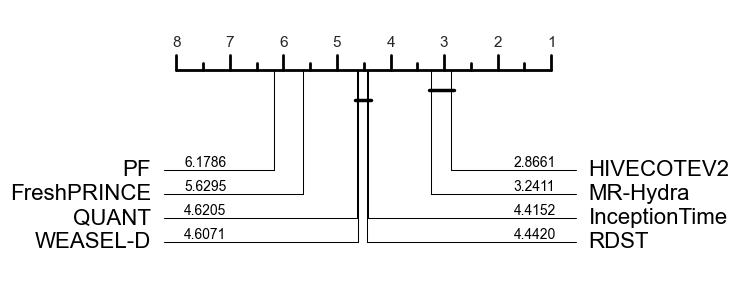

In [48]:
from aeon.benchmarking import get_available_estimators
from aeon.benchmarking.results_loaders import (
    get_estimator_results,
    get_estimator_results_as_array,
)
from aeon.visualisation import (
    plot_boxplot_median,
    plot_critical_difference,
    plot_pairwise_scatter,
)

cls = get_available_estimators(task="classification", return_dataframe=False)
print(len(cls), " classifier results available\n", cls)
resamples_all, data_names = get_estimator_results_as_array(
    estimators=cls, default_only=False
)
# results are loaded from
# https://timeseriesclassification.com/results/ReferenceResults.
# You can download the files directly from there
print(resamples_all.shape)
classifiers = [
    "FreshPRINCE",
    "HIVECOTEV2",
    "InceptionTime",
    "WEASEL-D",
    "MR-Hydra",
    "RDST",
    "QUANT",
    "PF"
]
resamples_all, data_names = get_estimator_results_as_array(
    estimators=classifiers, default_only=False
)
plot = plot_critical_difference(
    resamples_all, classifiers, test="wilcoxon", correction="holm"
)